## Q 박스오피스 data 분석

1. 박스오피스 2019년 한국 박스오피스 data를 엑셀로 받고 데이터프레임을 완성하시오

In [88]:
import pandas as pd
from pandas import DataFrame
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False

In [179]:
skip=[0,1,2,3,4,5,6,7] #읽고 싶지 않은 행 설정
df=pd.read_excel("KOBIS_기간별박스오피스_2022-04-12.xlsx", skiprows=skip, skipfooter=1) #스킵할 행 설정 + 마지막 행 스킵
df2=df[(df['개봉일']>'2019') & (df['개봉일']<'2020')] #2019년도에 개봉한 영화들만 거르기
data=df2.iloc[:,1:10].reset_index(drop=True) #필요한 헤더까지만 거르기
data

,영화명,개봉일,매출액,점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수
0,극한직업,2019-01-23,139651845516,0.144,139651845516,16265618,16265618,2003,292584
1,기생충,2019-05-30,85883963645,0.088,85883963645,10085275,10085275,1948,192855
2,엑시트,2019-07-31,79232012162,0.082,79232012162,9426011,9426011,1660,202223
3,백두산,2019-12-19,52905789770,0.054,52905789770,6290502,6290502,1971,99915
4,봉오동 전투,2019-08-07,40588648538,0.042,40588648538,4787538,4787538,1476,107030
...,...,...,...,...,...,...,...,...,...
691,학생의 엄마 : 첫 섹스 하던 날 2,2019-04-02,6000,0.000,6000,1,1,1,1
692,학생의 엄마 : 첫 섹스 하던 날 2 무삭제,2019-07-16,6000,0.000,6000,1,1,1,1
693,형부를 탐하다 무삭제판,2019-10-08,5000,0.000,5000,1,1,1,1
694,형수의 엉덩이,2019-10-21,1000,0.000,1000,1,1,1,1


2. 개봉일 기준 월별 매출순위(1~100)를 막대그래프와 꺽은선 그래프로 같이 표시하시오

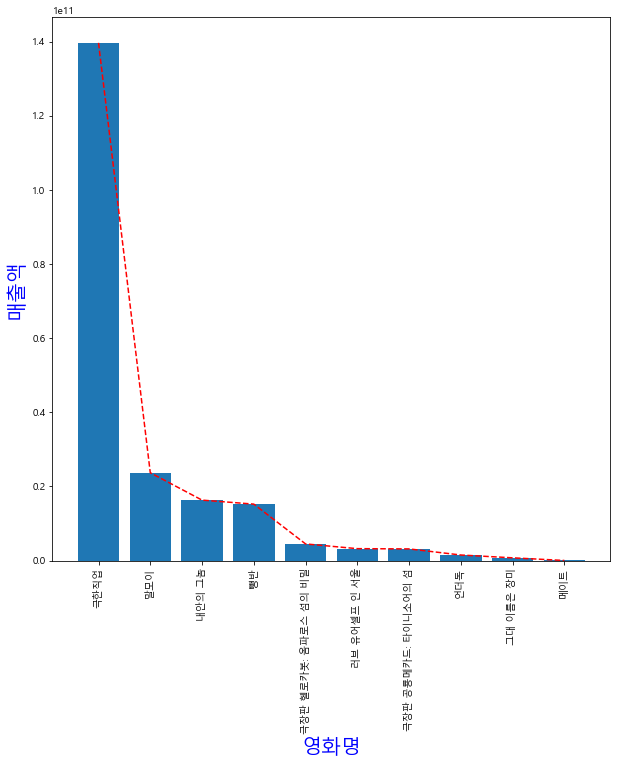

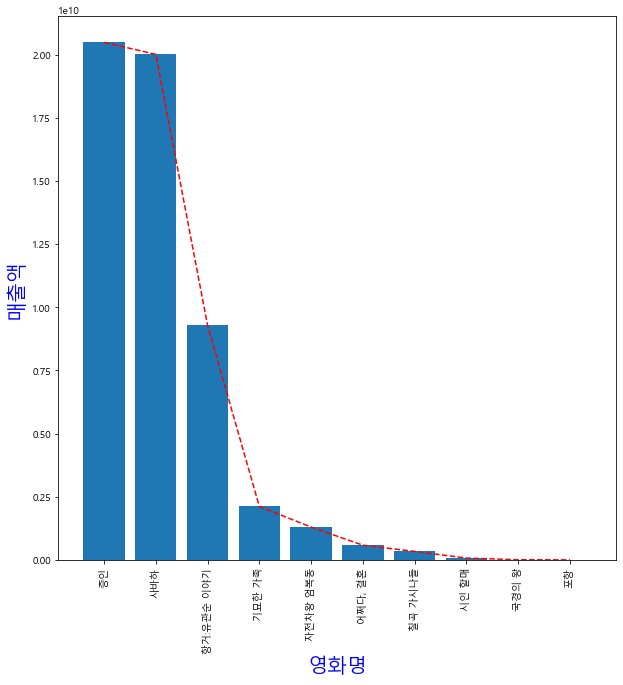

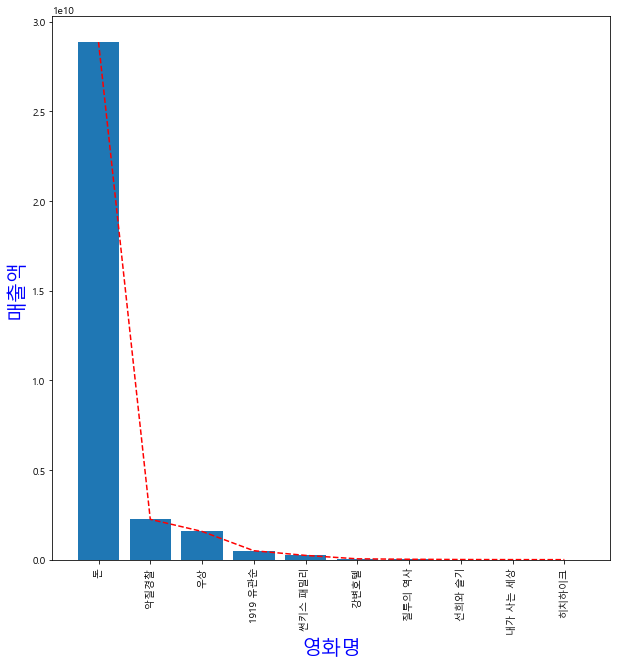

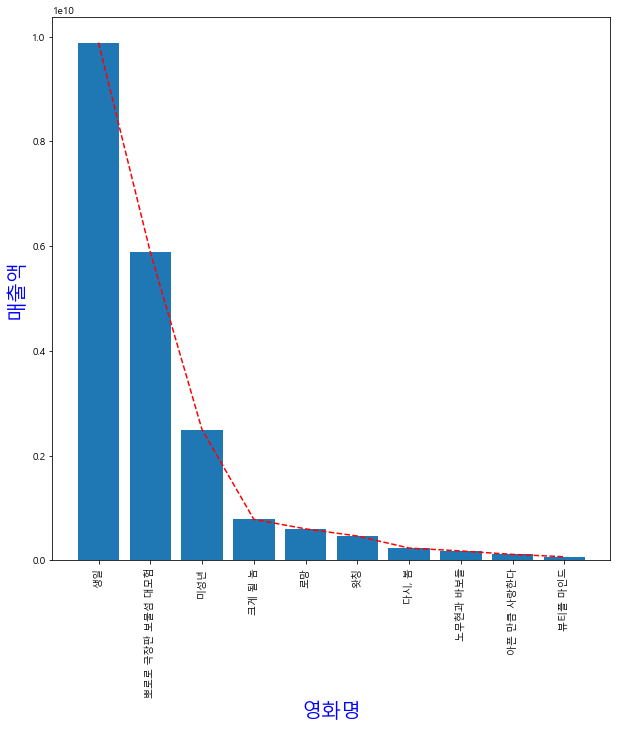

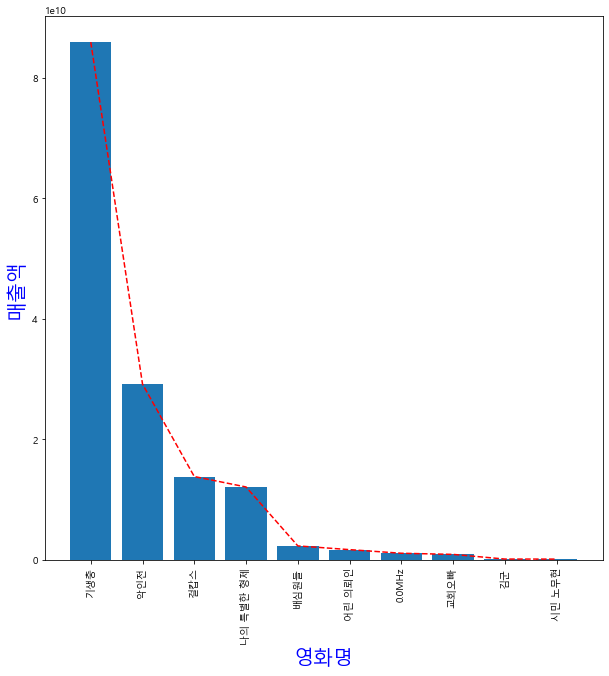

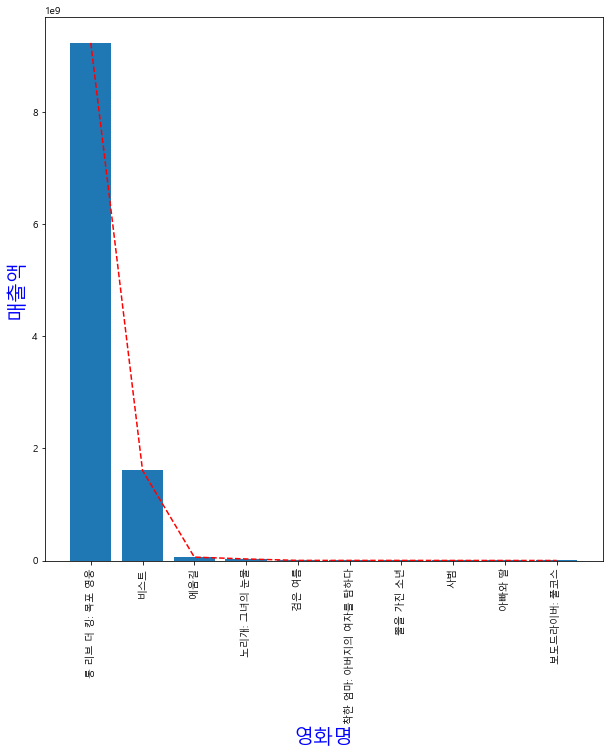

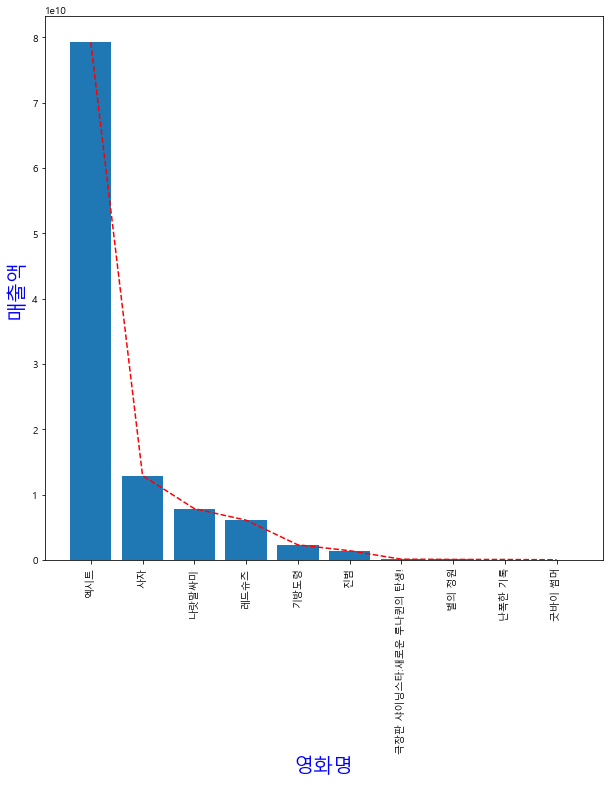

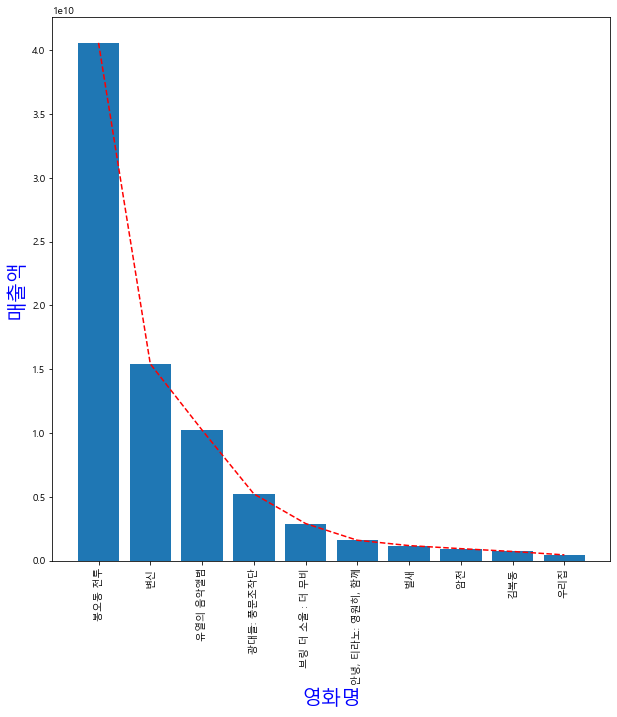

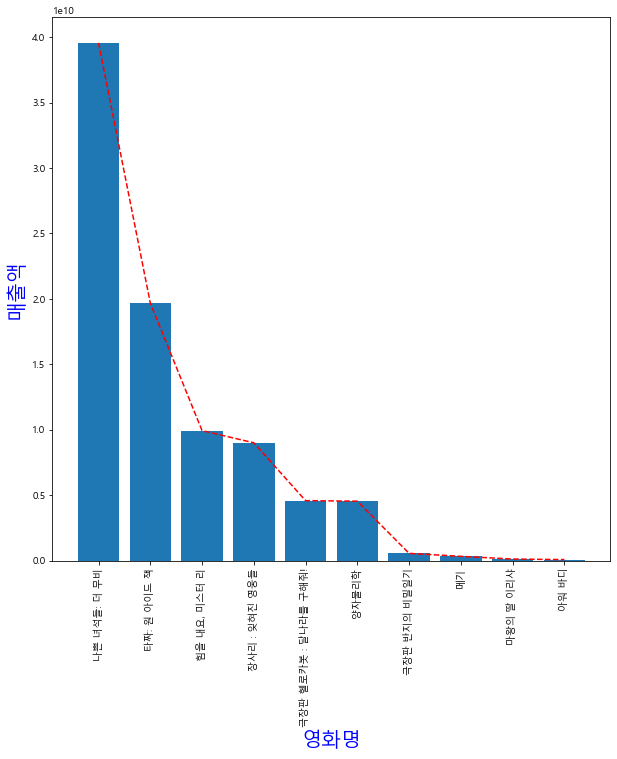

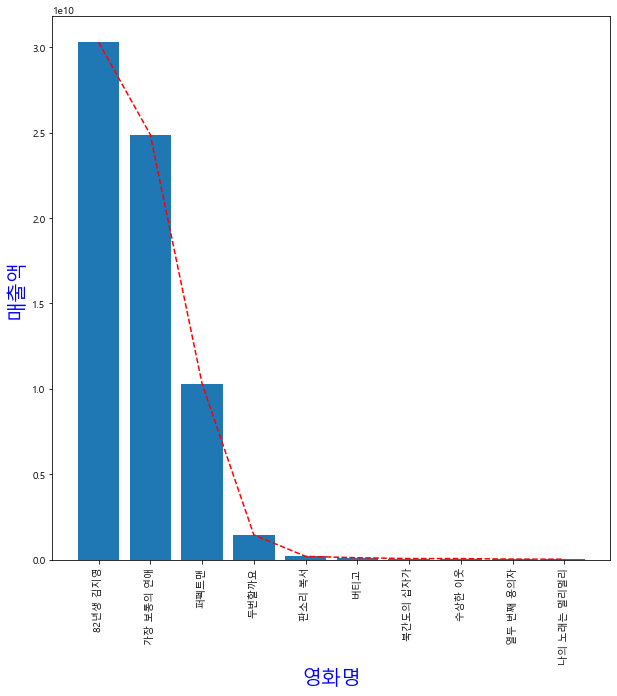

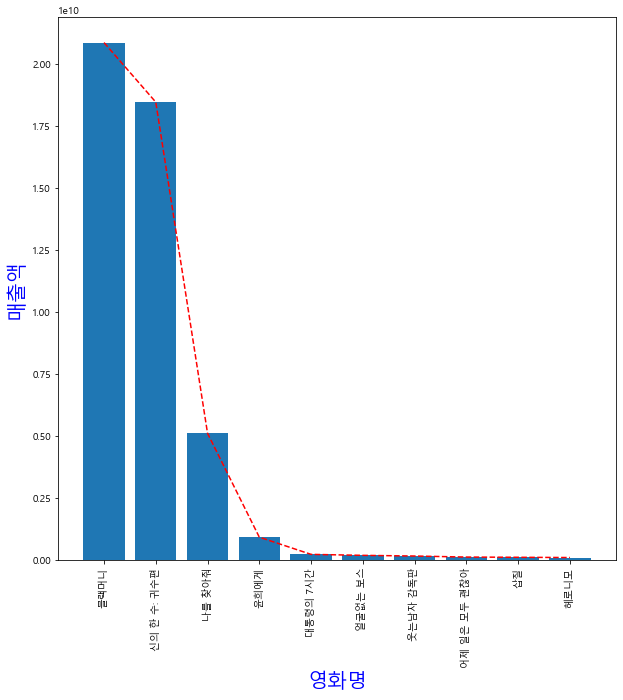

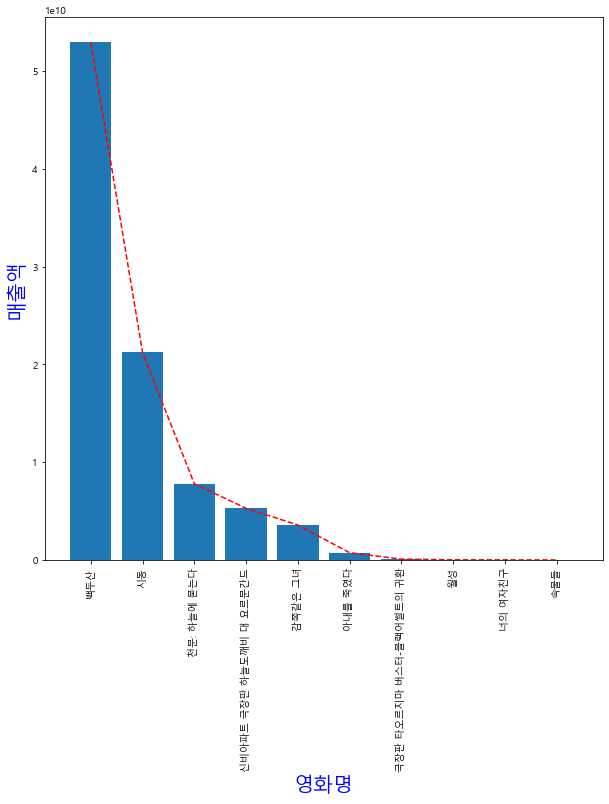

In [259]:
data['개봉일']=data['개봉일'].astype('str') #개봉일 비교를 위해 str타입으로 변경
data1=[] #data를 월별로 나누어서 data1리스트에 저장
for i in range(1,13):
    if i<9: #1월부터 8월까지
        data1.append(data[(data['개봉일']>f'2019-0{i}') & (data['개봉일']<f'2019-0{i+1}')].reset_index(drop=True))
    elif i==9: #9월
        data1.append(data[(data['개봉일']>f'2019-0{i}') & (data['개봉일']<f'2019-{i+1}')].reset_index(drop=True))
    elif i>9 and i<12: #10월부터 11월까지
        data1.append(data[(data['개봉일']>f'2019-{i}') & (data['개봉일']<f'2019-{i+1}')].reset_index(drop=True))
    else: #12월
        data1.append(data[(data['개봉일']>f'2019-{i}')].reset_index(drop=True))

for i in range(len(data1)):   
    b_d=data1[i].sort_values('매출액',ascending=False) #매출액 기준으로 내림차순 정렬=매출순위 확인
    plt.bar(b_d['영화명'][:10],b_d['매출액'][:10]) #영화명을 x축으로 매출액을 y축으로 하는 막대 그래프 그리기
    plt.plot(b_d['영화명'][:10],b_d['매출액'][:10],'r--') #영화명을 x축으로 매출액을 y축으로 하는 선 그래프 그리기
    plt.xlabel('영화명',fontsize=20,c='b')
    plt.ylabel('매출액',fontsize=20,c='b') 
    plt.xticks(rotation=90) #x축이 잘보이게 90도 회전
    plt.show()

3. 스크린수 대비 매출액을 산출하여 1~100위까지를 시각화 하시오

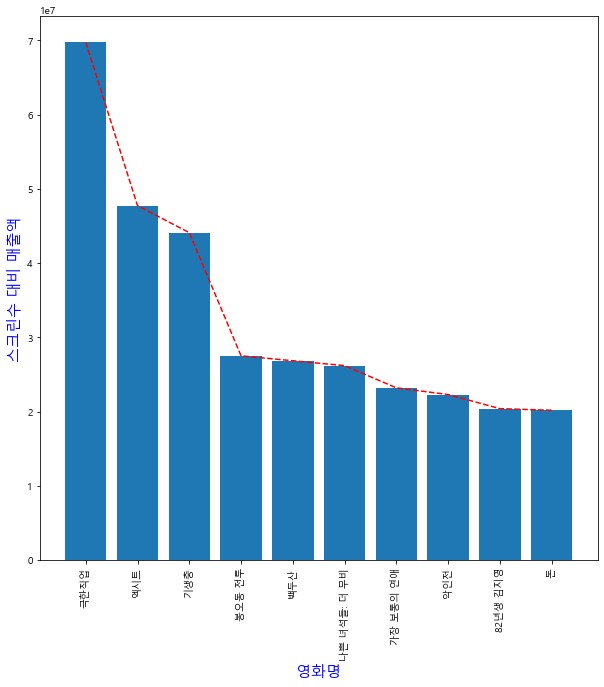

In [197]:
a=data['영화명'] #시리즈 추출
b=data['매출액'] // data['스크린수'] #시리즈 추출
b.name="스크린수 대비 매출액"

c=pd.concat([a,b], axis=1) #영화명 시리즈와 스크린수 대비 매출액 시리즈를 붙여서 데이터프레임 생성
data3=c.sort_values('스크린수 대비 매출액',ascending=False).reset_index(drop=True) #스크린수 대비 매출액 기준으로 내림차순 정렬(순위 정리)


plt.bar(data3['영화명'][:10],data3['스크린수 대비 매출액'][:10]) #영화명을 x축으로 스크린수 대비 매출액을 y축으로 두는 막대그래프 그리기
plt.plot(data3['영화명'][:10],data3['스크린수 대비 매출액'][:10],'r--') #영화명을 x축으로 스크린수 대비 매출액을 y축으로 두는 선그래프 그리기
plt.xlabel("영화명",fontsize=15,c='b')
plt.ylabel("스크린수 대비 매출액",fontsize=15,c='b')
plt.xticks(rotation=90) #x축이 잘보이게 90도 회전
plt.show()

4. 상영횟수 대비 관객수를 계산하여 1회 상영시 평균 관객수를 이용하여 1~100위 를 시각화 하시오

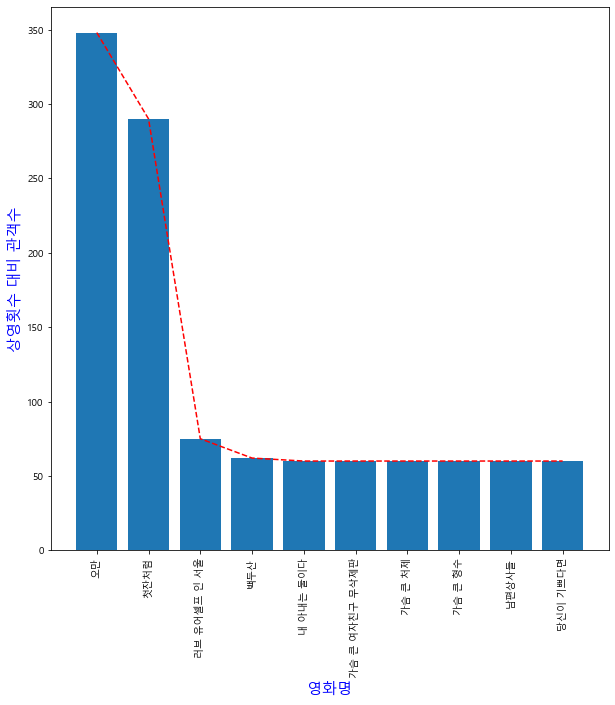

In [195]:
a=data['영화명']
b=data['관객수']//data['상영횟수']
b.name="상영횟수 대비 관객수"

c=pd.concat([a,b], axis=1) #영화명 시리즈와 상영횟수 대비 관객수 시리즈를 붙여서 데이터프레임 생성
data4=c.sort_values('상영횟수 대비 관객수',ascending=False).reset_index(drop=True) #상영횟수 대비 관객수 기준으로 내림차순 정렬(순위 정리)

plt.bar(data4['영화명'][:10],data4['상영횟수 대비 관객수'][:10]) #영화명을 x축으로 상영횟수 대비 관객수를 y축으로 두는 막대그래프 그리기
plt.plot(data4['영화명'][:10],data4['상영횟수 대비 관객수'][:10],'r--') #영화명을 x축으로 상영횟수 대비 관객수를 y축으로 두는 선 그래프 그리기
plt.xlabel("영화명",fontsize=15,c='b')
plt.ylabel("상영횟수 대비 관객수",fontsize=15,c='b')
plt.xticks(rotation=90) #x축이 잘보이게 90도 회전
plt.show()

5. 관객수 대비 누적매출액을 계산하여 평균 1명당 영화 관람에 사용한 금액을 계산하여 1~100위까지의 순위를 시각화 하시오

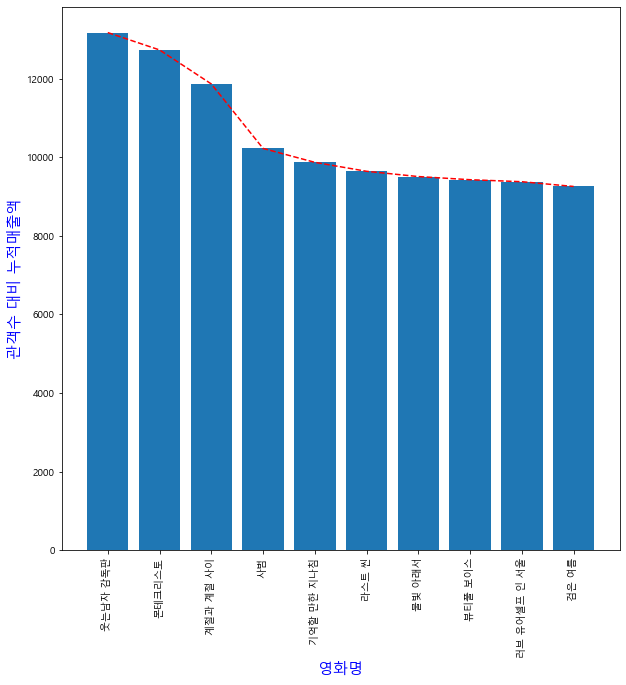

In [200]:
a=data['영화명']
b=data['누적매출액']//data['관객수']
b.name="관객수 대비 누적매출액"

c=pd.concat([a,b],axis=1)
data5=c.sort_values('관객수 대비 누적매출액',ascending=False).reset_index(drop=True)

plt.bar(data5['영화명'][:10],data5['관객수 대비 누적매출액'][:10]) #영화명을 x축으로 관객수 대비 누적매출액을 y축으로 두는 막대그래프 그리기
plt.plot(data5['영화명'][:10],data5['관객수 대비 누적매출액'][:10],'r--') #영화명을 x축으로 관객수 대비 누적매출액을 y축으로 두는 선 그래프 그리기
plt.xlabel("영화명",fontsize=15,c='b')
plt.ylabel("관객수 대비 누적매출액",fontsize=15,c='b')
plt.xticks(rotation=90) #x축이 잘보이게 90도 회전
plt.show()

6. 스크린수 대비 상영횟수를 계산하여 평균 1개의 스크린에서 상영한 횟수를 통한 1~100위 순위를 시각화 하시오

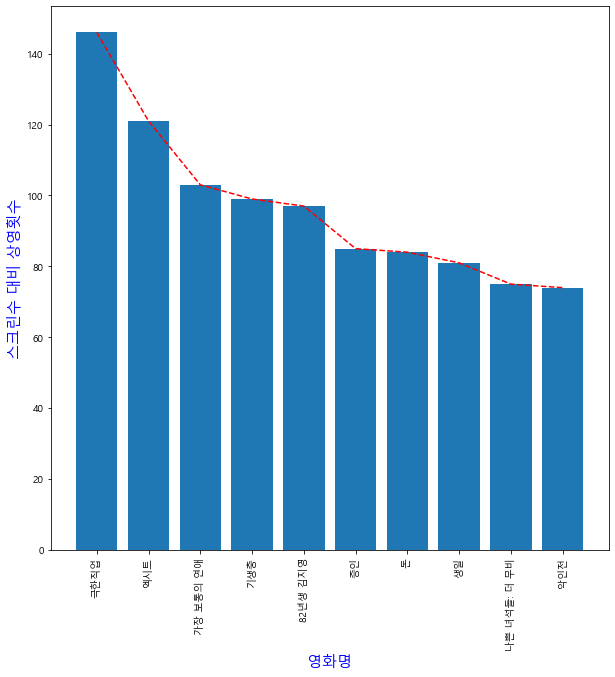

In [203]:
a=data['영화명']
b=data['상영횟수']//data['스크린수']
b.name="스크린수 대비 상영횟수"

c=pd.concat([a,b],axis=1)
data6=c.sort_values('스크린수 대비 상영횟수',ascending=False).reset_index(drop=True)

plt.bar(data6['영화명'][:10],data6['스크린수 대비 상영횟수'][:10]) #영화명을 x축으로 관객수 대비 누적매출액을 y축으로 두는 막대그래프 그리기
plt.plot(data6['영화명'][:10],data6['스크린수 대비 상영횟수'][:10],'r--') #영화명을 x축으로 관객수 대비 누적매출액을 y축으로 두는 선 그래프 그리기
plt.xlabel("영화명",fontsize=15,c='b')
plt.ylabel("스크린수 대비 상영횟수",fontsize=15,c='b')
plt.xticks(rotation=90) #x축이 잘보이게 90도 회전
plt.show()

7. 매출액 점유 기준 1~100위 를 선별하고 원그래프를 만드시오

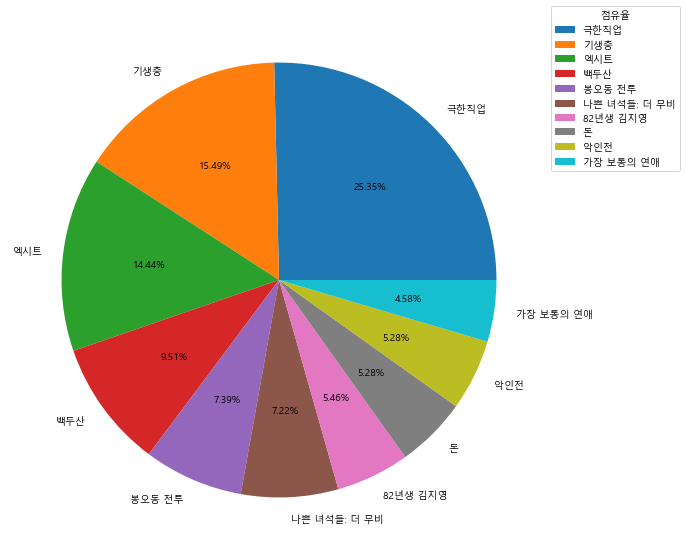

In [222]:
data7=data.sort_values('점유율',ascending=False).reset_index(drop=True) #data를 점유율 기준으로 내림차순 정렬(순위 설정)
p_d=data7['점유율'][:10]*100 #정렬한 데이터에서 10개의 점유율 데이터만 가져오기
name=data7['영화명'][:10] #정렬한 데이터에서 10개의 영화명 데이터만 가져오기
plt.pie(p_d,labels=name,autopct='%.2f%%') #가져온 p_d와 name으로 원 그래프 그리기
plt.legend(loc=(1,0.7),title="점유율")
plt.show()

8. 위 문제에서 만든 data에서 5위까지의 점유를 제외한 6위~100위 까지의 점유율을 원그래프로 나타내시오

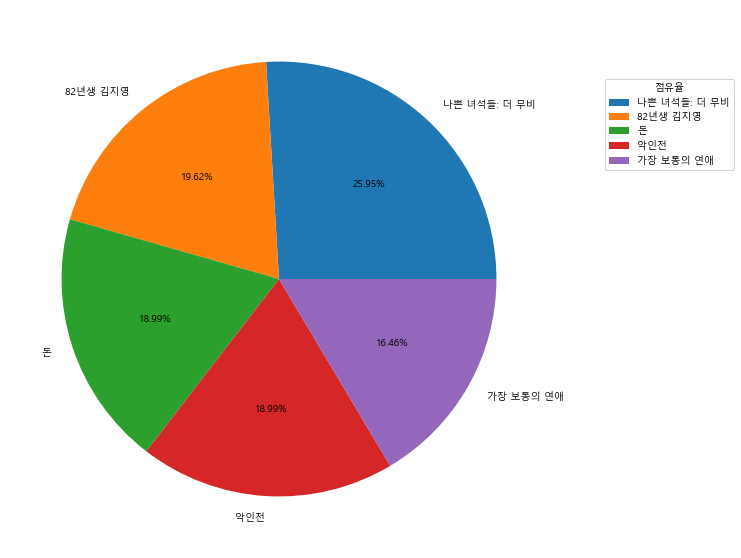

In [231]:
data8=data7[5:10].reset_index(drop=True) #data7에서 6위부터 10위까지의 데이터만 꺼냄
p_d2=data8['점유율']*100 #data8에서 점유율 데이터만 가져오기
name=data8['영화명'] #data8에서 영화명 데이터만 가져오기

plt.pie(p_d2,labels=name,autopct='%.2f%%') #p_d2와 name으로 원 그래프 그리기
plt.legend(loc=(1.1,0.7),title="점유율")
plt.show()